# 1. Importar Librerías

In [3]:
import numpy as np
import joblib

import tensorflow as tf
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import plotly.express as px

# 2. Importar Datos

In [4]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')

# 3. Modelos

## 3.1. Modelo Random Forest Classifier

In [5]:
x_test.shape

(1737, 100, 100, 3)

In [6]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [8]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [19]:
print('------------------------TRAIN---------------------------')
pred_train = rf.predict_proba(x_train2)[:, 1]
pred_train = (pred_train > 0.98).astype(int)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

print()
print('------------------------TEST---------------------------')
pred_test = rf.predict_proba(x_test2)[:, 1]
pred_test = (pred_test > 0.98).astype(int)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

------------------------TRAIN---------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2864
           1       1.00      0.77      0.87      4089

    accuracy                           0.86      6953
   macro avg       0.88      0.88      0.86      6953
weighted avg       0.90      0.86      0.86      6953


------------------------TEST---------------------------
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       716
           1       1.00      0.58      0.73      1021

    accuracy                           0.75      1737
   macro avg       0.81      0.79      0.75      1737
weighted avg       0.85      0.75      0.75      1737



0.7899118511263468

## 3.2. Red Neuronal Estándar

In [7]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])

In [9]:
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - AUC: 0.7315 - Precision: 0.7568 - Recall: 0.6940 - accuracy: 0.6936 - loss: 0.8279 - val_AUC: 0.9514 - val_Precision: 0.9205 - val_Recall: 0.9638 - val_accuracy: 0.9298 - val_loss: 0.2743
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - AUC: 0.9545 - Precision: 0.9268 - Recall: 0.9358 - accuracy: 0.9183 - loss: 0.2776 - val_AUC: 0.9701 - val_Precision: 0.9570 - val_Recall: 0.9383 - val_accuracy: 0.9390 - val_loss: 0.2090
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - AUC: 0.9735 - Precision: 0.9489 - Recall: 0.9464 - accuracy: 0.9388 - loss: 0.2058 - val_AUC: 0.9840 - val_Precision: 0.9840 - val_Recall: 0.8423 - val_accuracy: 0.8993 - val_loss: 0.2622
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - AUC: 0.9796 - Precision: 0.9555 - Recall: 0.9441 - accuracy: 0.9415 - loss: 0.1852 - val_AUC: 0.9860 - val_Precision: 0.9625 - val_Recall: 0.9814 - val_accuracy: 0.9666 - val_loss: 0.1337
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━

In [10]:
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 5ms/step - AUC: 0.9886 - Precision: 0.9732 - Recall: 0.9589 - accuracy: 0.9603 - loss: 0.1330
Test auc: 0.988588809967041


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       716
           1       0.99      0.76      0.86      1021

    accuracy                           0.86      1737
   macro avg       0.87      0.88      0.86      1737
weighted avg       0.89      0.86      0.86      1737



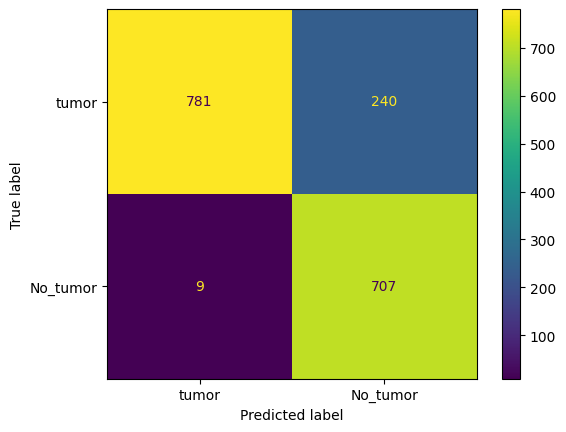

In [11]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


In [23]:
p = fc_model.predict(x_test)
hist = px.histogram(p, title = 'Distribución de las predicciones', labels = {'value' : 'Predicciones', 'count' : 'Frecuencia'})
hist.update_layout(showlegend = False)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## 3.3. Red Neuronal Convolucional

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [25]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [26]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - AUC: 0.7280 - loss: 0.5865 - val_AUC: 0.9776 - val_loss: 0.2078
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - AUC: 0.9691 - loss: 0.2207 - val_AUC: 0.9872 - val_loss: 0.1653
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - AUC: 0.9883 - loss: 0.1378 - val_AUC: 0.9911 - val_loss: 0.1133
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - AUC: 0.9935 - loss: 0.0948 - val_AUC: 0.9930 - val_loss: 0.0909
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - AUC: 0.9961 - loss: 0.0727 - val_AUC: 0.9951 - val_loss: 0.0951
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - AUC: 0.9977 - loss: 0.0529 - val_AUC: 0.9953 - val_loss: 0.0598
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - AUC: 0.9989 - loss: 0.0336 - val_AUC: 0.9960 - val_loss: 0.0564
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - AUC: 0.9990 - loss: 0.0280 - val_AUC: 0.9970 - val_loss: 0.0446
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step -

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       716
           1       0.99      0.94      0.97      1021

    accuracy                           0.96      1737
   macro avg       0.96      0.97      0.96      1737
weighted avg       0.96      0.96      0.96      1737



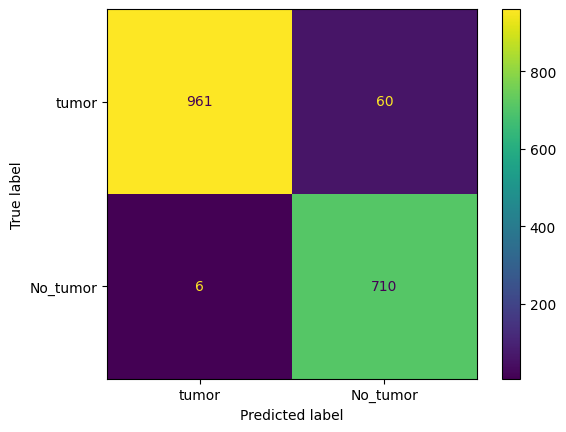

In [27]:
pred_test1=(model.predict(x_test) >= 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))


In [28]:
p = model.predict(x_test)
hist = px.histogram(p, title = 'Distribución de las predicciones', labels = {'value' : 'Predicciones', 'count' : 'Frecuencia'})
hist.update_layout(showlegend = False)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [135]:
falsos_n = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    # Si la predicción es 0 (no hay tumor) 
    if pred_test1[i] == 0 and y_test[i] == 1:
        falsos_n.append(i)

falsos_n

[791, 1230, 1726, 1727, 1728, 1735, 1736]

In [136]:
falsos_p = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    if pred_test1[i] == 1 and y_test[i] == 0:
        falsos_p.append(i)

falsos_p

[146, 398, 412, 415, 438, 456, 457, 472, 473]